In [2]:
%pip install billboard.py
%pip install spotipy
%pip install lyricsgenius
%pip install textblob

  Using cached billboard.py-6.2.1-py2.py3-none-any.whl (7.0 kB)
  Using cached beautifulsoup4-4.9.3-py3-none-any.whl (115 kB)
  Using cached soupsieve-2.2.1-py3-none-any.whl (33 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached spotipy-2.18.0-py3-none-any.whl (26 kB)
  Using cached urllib3-1.26.4-py2.py3-none-any.whl (153 kB)
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
  Attempting uninstall: requests
    Found existing installation: requests 2.24.0
    Uninstalling requests-2.24.0:
      Successfully uninstalled requests-2.24.0
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 59 kB 843 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.
  Using cached textblob-0.15.3-py2.py3-none-any.whl 

In [1]:
import os
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.cache_handler import CacheFileHandler

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=os.environ['SPOTIFY_CLIENT_ID'], client_secret=os.environ['SPOTIFY_CLIENT_SECRET'], cache_handler=CacheFileHandler(username='keatonconrad')))

In [2]:
full_df = pd.read_csv('./complete_project_data.csv')
print(full_df.columns)
full_df.describe()

Index(['Artist', 'Track', 'Year', 'Month', 'ArtistScore', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Label'],
      dtype='object')


,Year,Month,ArtistScore,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Label
count,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000
mean,2003.747283,4.956535,0.235952,0.567917,0.662381,5.420987,-7.996675,0.667805,0.091503,0.223048,0.121647,0.206589,0.507326,119.978682,0.413847
std,6.414616,3.751766,0.424658,0.180537,0.228717,3.522913,4.404025,0.471074,0.113845,0.285178,0.269927,0.181087,0.252662,29.839705,0.492598
min,1990.000000,1.000000,0.000000,0.000000,0.000549,0.000000,-39.716000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1999.000000,1.000000,0.000000,0.453000,0.519000,2.000000,-9.649000,0.000000,0.034000,0.008450,0.000000,0.094300,0.307000,96.408000,0.000000
50%,2005.000000,4.000000,0.000000,0.581000,0.700000,6.000000,-6.980000,1.000000,0.046600,0.079400,0.000038,0.133000,0.515000,118.030000,0.000000
75%,2008.000000,9.000000,0.000000,0.703000,0.851000,9.000000,-5.122000,1.000000,0.089300,0.348000,0.020900,0.266000,0.713000,139.352000,1.000000
max,2018.000000,12.000000,1.000000,0.967000,0.999000,11.000000,0.316000,1.000000,0.956000,0.996000,0.985000,0.983000,0.992000,211.092000,1.000000


In [3]:
hit_df = full_df.loc[full_df['Label'] == 1]
hit_df.describe()

,Year,Month,ArtistScore,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Label
count,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.0
mean,2002.616654,4.945236,0.450113,0.621908,0.686860,5.378845,-6.766668,0.676669,0.080921,0.161652,0.018826,0.178469,0.542341,120.150712,1.0
std,6.667517,3.885080,0.497692,0.151258,0.176688,3.506074,2.716867,0.467923,0.088262,0.200756,0.094748,0.144053,0.227725,29.634562,0.0
min,1990.000000,1.000000,0.000000,0.113000,0.152000,0.000000,-20.329000,0.000000,0.022100,0.000003,0.000000,0.021400,0.038800,60.009000,1.0
25%,1997.000000,1.000000,0.000000,0.523000,0.557000,2.000000,-8.381000,0.000000,0.031800,0.014100,0.000000,0.086400,0.359000,96.990000,1.0
50%,2004.000000,4.000000,0.000000,0.624000,0.704000,6.000000,-6.320000,1.000000,0.043700,0.073700,0.000002,0.124000,0.551000,116.960000,1.0
75%,2008.000000,9.000000,1.000000,0.728000,0.831000,8.000000,-4.795000,1.000000,0.080800,0.239000,0.000201,0.225000,0.725000,139.352000,1.0
max,2018.000000,12.000000,1.000000,0.967000,0.993000,11.000000,-0.463000,1.000000,0.950000,0.970000,0.904000,0.953000,0.974000,209.819000,1.0


In [4]:
no_hit_df = full_df.loc[full_df['Label'] == 0]
no_hit_df.describe()

,Year,Month,ArtistScore,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Label
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.0
mean,2004.545551,4.964513,0.084746,0.529797,0.645097,5.450742,-8.865107,0.661547,0.098974,0.266396,0.194242,0.226443,0.482604,119.857222,0.0
std,6.106808,3.655735,0.278577,0.189619,0.257887,3.535378,5.105186,0.473309,0.128384,0.325245,0.324426,0.200889,0.266178,29.990939,0.0
min,1990.000000,1.000000,0.000000,0.000000,0.000549,0.000000,-39.716000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.0
25%,2001.000000,1.000000,0.000000,0.391000,0.473000,2.000000,-10.852000,0.000000,0.035800,0.005147,0.000002,0.098800,0.261750,96.050250,0.0
50%,2005.000000,4.000000,0.000000,0.540000,0.692500,6.000000,-7.625500,1.000000,0.049400,0.088950,0.000780,0.139000,0.472500,118.804500,0.0
75%,2008.000000,8.000000,0.000000,0.678000,0.864000,9.000000,-5.514750,1.000000,0.096100,0.509500,0.256250,0.293250,0.704000,139.259250,0.0
max,2018.000000,12.000000,1.000000,0.955000,0.999000,11.000000,0.316000,1.000000,0.956000,0.996000,0.985000,0.983000,0.992000,211.092000,0.0


In [5]:
for column in full_df.columns:
    try:
        t = ttest_ind(hit_df[column].astype(float), no_hit_df[column].astype(float))
        print(column + ' - T: ' + str(t[0]) + ', p: ' + str(t[1]))
    except ValueError:
        continue

Year - T: -8.497851175008677, p: 2.910348161438126e-17
Month - T: -0.14359683612356966, p: 0.8858278273848174
ArtistScore - T: 26.548292468109256, p: 1.3300193650842745e-140
Danceability - T: 14.732117951682536, p: 1.3740732817494376e-47
Energy - T: 5.124048959168732, p: 3.1666377987185003e-07
Key - T: -0.5704045496085217, p: 0.5684431554836452
Loudness - T: 13.699503051631693, p: 1.4641469665979599e-41
Mode - T: 0.8973130956926103, p: 0.36961897465460203
Speechiness - T: -4.445664446382184, p: 9.058013539866851e-06
Acousticness - T: -10.437419860375924, p: 4.189519931411545e-25
Instrumentalness - T: -19.171379290643987, p: 1.1684677548797206e-77
Liveness - T: -7.467982661621595, p: 1.0428399478553285e-13
Valence - T: 6.653067329482239, p: 3.3602633444171025e-11
Tempo - T: 0.2748883662939562, p: 0.7834196464087834
Label - T: inf, p: 0.0


In [6]:
df = full_df.head(4000)

In [7]:
import lyricsgenius
genius = lyricsgenius.Genius(os.environ['GENIUS_TOKEN'], verbose=False, remove_section_headers=True)

In [9]:
import re
from textblob import TextBlob
import pickle

polarity = []
subjectivity = []
lyrics = []

for i, song in df.iterrows():
    try:
        song = genius.search_song(song['Track'], song['Artist'])
        song_lyrics = re.sub(r'\[.*?\]\n', '', song.lyrics).replace('\n', ' ')
        blob = TextBlob(song_lyrics)
        polarity.append(blob.sentiment[0])
        subjectivity.append(blob.sentiment[1])
        lyrics.append(song_lyrics)
    except:
        polarity.append(None)
        subjectivity.append(None)
        lyrics.append(None)
        
with open('polarity.pickle', 'wb') as f:
    pickle.dump(polarity, f)
with open('subjectivity.pickle', 'wb') as f:
    pickle.dump(subjectivity, f)
with open('lyrics.pickle', 'wb') as f:
    pickle.dump(lyrics, f)

Searching for "american woman" by lenny kravitz...
Done.
Searching for "midnight in memphis" by j.j. cale...
Specified song does not contain lyrics. Rejecting.
Searching for "intro / time for some action" by n.e.r.d....
Done.
Searching for "this" by darius rucker...
Done.
Searching for "what i need" by crystal waters...
Done.
Searching for "only for the young" by george lopez...
Done.
Searching for "top back" by t.i....
Done.
Searching for "crossover" by epmd...
Done.
Searching for "green mind" by dinosaur jr...
Done.
Searching for "after party" by koffee brown...
Done.
Searching for "naughty girl" by beyonce...
Done.
Searching for "planetary takeover" by snowgoons...
No results found for: 'planetary takeover snowgoons'
Searching for "im awesome" by spose...
Done.
Searching for "heart trouble" by martina mcbride...
Done.
Searching for "i get it in" by omarion featuring gucci mane...
Done.
Searching for "fall away into darkness" by the balustrade ensemble...
Done.
Searching for "when i 

In [7]:
import pickle

with open('polarity.pickle', 'rb') as f:
    polarity = pickle.load(f)
with open('subjectivity.pickle', 'rb') as f:
    subjectivity = pickle.load(f)
with open('lyrics.pickle', 'rb') as f:
    lyrics = pickle.load(f)

In [8]:
df = pd.DataFrame(df)
df['Polarity'] = polarity
df['Subjectivity'] = subjectivity
df['Lyrics'] = lyrics
# df['LyricLength'] = df['Lyrics'].str.len()

In [9]:
df.dropna(inplace=True)
df.describe()

,Year,Month,ArtistScore,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Label,Polarity,Subjectivity
count,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000,2874.000000
mean,2003.599861,4.942589,0.262004,0.573522,0.674005,5.445720,-7.606973,0.672234,0.090550,0.204022,0.090259,0.202436,0.512747,120.207288,0.460334,0.092679,0.492367
std,6.425721,3.776451,0.439801,0.176224,0.218818,3.517745,3.963045,0.469481,0.108350,0.268409,0.232192,0.175639,0.247451,29.686344,0.498511,0.172876,0.155837
min,1990.000000,1.000000,0.000000,0.000000,0.013700,0.000000,-39.716000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,1999.000000,1.000000,0.000000,0.463000,0.530250,2.000000,-9.212500,0.000000,0.033700,0.007647,0.000000,0.094450,0.316000,96.530500,0.000000,0.000000,0.430786
50%,2005.000000,4.000000,0.000000,0.585000,0.709500,6.000000,-6.749000,1.000000,0.046500,0.072300,0.000020,0.130000,0.519500,118.178000,0.000000,0.079588,0.502144
75%,2008.000000,9.000000,1.000000,0.703000,0.852000,9.000000,-5.012500,1.000000,0.089475,0.307750,0.007160,0.257000,0.711000,139.509500,1.000000,0.186906,0.571786
max,2018.000000,12.000000,1.000000,0.967000,0.999000,11.000000,-0.463000,1.000000,0.950000,0.996000,0.978000,0.983000,0.974000,211.092000,1.000000,1.000000,1.000000


In [10]:
import sklearn as sk
from sklearn.model_selection import train_test_split

y_data = df['Label']
x_data = df.drop(['Label', 'Artist', 'Track', 'Month', 'Lyrics', 'Key', 'Mode'], axis=1, inplace=False)
x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(
    x_data, y_data, test_size=0.15, shuffle=False
)
seqs_train, seqs_eval = train_test_split(df['Lyrics'], test_size=0.15, shuffle=False)
print(len(y_data_train))
print(len(seqs_train))
print(len(x_data_train))

2442
2442
2442


In [11]:
from sklearn.preprocessing import StandardScaler

scaler_model = StandardScaler()
scaler_model.fit(x_data_train)

x_data_train = pd.DataFrame(
    scaler_model.transform(x_data_train),
    columns=x_data_train.columns,
    index=x_data_train.index
)
x_data_test = pd.DataFrame(
    scaler_model.transform(x_data_test),
    columns=x_data_test.columns,
    index=x_data_test.index
)

In [12]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0).fit(x_data_train, y_data_train)
round(LR.score(x_data_test, y_data_test), 4)

0.7685

In [13]:
SVM = sk.svm.LinearSVC()
SVM.fit(x_data_train, y_data_train)
round(SVM.score(x_data_test, y_data_test), 4)

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7685

In [14]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0)
RF.fit(x_data_train, y_data_train)
round(RF.score(x_data_test, y_data_test), 4)

0.7778

In [15]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(x_data_train, y_data_train)
round(NN.score(x_data_test, y_data_test), 4)

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7755

In [39]:
from embeddings import EmbeddingGenerator

embedding = EmbeddingGenerator(
    max_sequence_len=100,
    filename='glove.6B.200d.txt',
    embedding_s3_bucket='shareport-internal',
    embedding_s3_key='glove.twitter.27B.200d.txt'
)

print('Pretrained embedding loaded')
print('Word index:', len(embedding.word_index))
print('Embedding dimension:', embedding.embedding_dimension)


embedding.generate_word_index(texts=seqs_train)  # Fits Tokenizer on words in X training data

# The below generate_sequences lines converts the words into integers,
# using the word indexes from the training data
seqs_train = embedding.generate_sequences(seqs_train)
seqs_eval = embedding.generate_sequences(seqs_eval)

print('Sequences created')

embedding.generate_embedding_matrix()

print('Vocab size:', embedding.vocab_size)
print(embedding.embedding_matrix.shape)

with open('embedding.pickle', 'wb') as f:
    pickle.dump(embedding, f)

KeyboardInterrupt: 

In [16]:
with open('embedding.pickle', 'rb') as f:
    embedding = pickle.load(f)
    
seqs_train = embedding.generate_sequences(seqs_train)
seqs_eval = embedding.generate_sequences(seqs_eval)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Embedding, \
    Input, Flatten, MaxPooling1D, Conv1D, concatenate
from tensorflow.keras.models import Model

In [25]:
print('Building model...')
# Branch 1
aux_input = Input(shape=(len(x_data_train.columns),))
aux = Dense(200, activation="relu")(aux_input)
aux = BatchNormalization()(aux)
aux = Model(inputs=aux_input, outputs=aux)

# Branch 2
emb_input = Input(shape=(embedding.max_sequence_len,))
emb = Embedding(embedding.vocab_size, embedding.embedding_dimension,
                input_length=embedding.max_sequence_len,
                weights=[embedding.embedding_matrix], trainable=True)(emb_input)
emb = Conv1D(filters=32, kernel_size=4, activation='relu')(emb)
emb = MaxPooling1D(8)(emb)
emb = Flatten()(emb)
emb = BatchNormalization()(emb)
emb = Dropout(.1)(emb)
emb = Dense(200, activation="relu")(emb)
emb = BatchNormalization()(emb)
emb = Dropout(.2)(emb)
emb = Dense(200, activation="relu")(emb)
emb = BatchNormalization()(emb)
emb = Model(inputs=emb_input, outputs=emb)

# Combined
combined = concatenate([aux.output, emb.output])
z = Dense(200, activation="relu")(combined)
z = BatchNormalization()(z)
z = Dropout(.2)(z)
z = Dense(200, activation="relu")(z)
z = BatchNormalization()(z)
z = Dropout(.2)(z)
z = Dense(200, activation="relu")(z)
z = BatchNormalization()(z)
z = Dropout(.2)(z)
z = Dense(200, activation="relu")(z)
z = BatchNormalization()(z)
z = Dropout(.2)(z)
z = Dense(200, activation="relu")(z)
z = BatchNormalization()(z)
z = Dropout(.2)(z)
z = Dense(200, activation="relu")(z)
z = BatchNormalization()(z)
z = Dropout(.2)(z)
z = Dense(200, activation="relu")(z)
z = BatchNormalization()(z)
z = Dropout(.2)(z)
z = Dense(200, activation="relu")(z)
z = BatchNormalization()(z)
z = Dense(1, activation="sigmoid")(z)

model = Model(inputs=[aux.input, emb.input], outputs=z)

optimizer = keras.optimizers.SGD(0.01)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

print(x_data_train.shape)
print(seqs_train.shape)
# print(model.summary())

Building model...
(2442, 13)
(2442, 100)


In [26]:
history = model.fit(
    [x_data_train, seqs_train],
    y_data_train,
    validation_data=([x_data_test, seqs_eval], y_data_test),
    batch_size=64,
    epochs=100,
    shuffle=True,
    verbose=2,
    callbacks=[es, rlr]
)

Epoch 1/100
39/39 - 3s - loss: 0.8623 - acc: 0.5078 - val_loss: 0.6943 - val_acc: 0.4630
Epoch 2/100
39/39 - 2s - loss: 0.7427 - acc: 0.5569 - val_loss: 0.6935 - val_acc: 0.5162
Epoch 3/100
39/39 - 2s - loss: 0.7121 - acc: 0.5921 - val_loss: 0.6936 - val_acc: 0.5139
Epoch 4/100
39/39 - 2s - loss: 0.6839 - acc: 0.6036 - val_loss: 0.6795 - val_acc: 0.5579
Epoch 5/100
39/39 - 2s - loss: 0.6537 - acc: 0.6274 - val_loss: 0.6894 - val_acc: 0.5347
Epoch 6/100
39/39 - 2s - loss: 0.6240 - acc: 0.6589 - val_loss: 0.6581 - val_acc: 0.5972
Epoch 7/100
39/39 - 2s - loss: 0.5993 - acc: 0.6773 - val_loss: 0.6070 - val_acc: 0.6782
Epoch 8/100
39/39 - 2s - loss: 0.5858 - acc: 0.6970 - val_loss: 0.5680 - val_acc: 0.6944
Epoch 9/100
39/39 - 2s - loss: 0.5708 - acc: 0.7060 - val_loss: 0.5316 - val_acc: 0.7407
Epoch 10/100
39/39 - 2s - loss: 0.5481 - acc: 0.7318 - val_loss: 0.5150 - val_acc: 0.7477
Epoch 11/100
39/39 - 2s - loss: 0.5476 - acc: 0.7113 - val_loss: 0.4885 - val_acc: 0.7500
Epoch 12/100
39/39 

In [30]:
pred_train = model.evaluate([x_data_train, seqs_train], y_data_train)
pred_test = model.evaluate([x_data_test, seqs_eval], y_data_test)
y_pred_train = model.predict([x_data_train, seqs_train]).astype('int').flatten()
y_pred = model.predict([x_data_test, seqs_eval]).astype('int').flatten()

14/14 [==============================] - 0s 5ms/step - loss: 0.4725 - acc: 0.8009


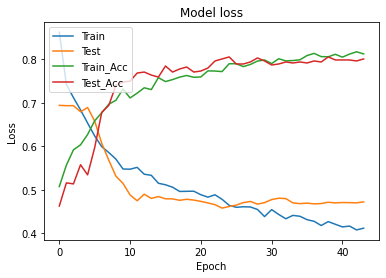

In [28]:
# %pip install matplotlib
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test', 'Train_Acc', 'Test_Acc'], loc='upper left')
plt.show()

In [ ]:
# %pip install seaborn
import seaborn as sns
from scipy.stats import pearsonr

df_corr = pd.DataFrame() # Correlation matrix
df_p = pd.DataFrame()  # Matrix of p-values
for x in x_data.columns:
    # for y in full_df.columns:
    corr = pearsonr(x_data[x], y_data)
    df_corr.loc[x,y] = corr[0]
    df_p.loc[x,y] = corr[1]


# mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)

f = plt.figure(figsize=(8, 7))
# plt.rc('xtick', labelsize=10)
# plt.rc('ytick', labelsize=10)
ax = sns.heatmap(df_corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .6})
ax.set_title('Pearson Correlation Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.show()

f = plt.figure(figsize=(8, 7))
# plt.rc('xtick', labelsize=10)
# plt.rc('ytick', labelsize=10)
ax = sns.heatmap(df_p, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .6})
ax.set_title('P-Value Matrix from Pearson Correlation')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.show()

In [32]:
import utils
from sklearn.metrics import mean_absolute_error, classification_report
from scipy.stats import ttest_rel

print(y_data_train)
print(y_pred_train)

print('--- Model Results ---')
print('MAE:', mean_absolute_error(y_data_test, y_pred))
print('R2:', utils.cd(y_data_test, y_pred))
print('Adjusted R2:', utils.adj_r2(y_data_test, y_pred, len(y_data_test), len(x_data_test.columns)))
print('MAE IoA:', utils.ioa(y_data_test, y_pred))
print('T-Test:', ttest_rel(y_data_test, y_pred))
print(classification_report(y_data_train, y_pred_train))
print(classification_report(y_data_test, y_pred))

0       1
2       0
3       1
4       1
5       0
       ..
2733    1
2734    0
2736    0
2737    1
2738    0
Name: Label, Length: 2442, dtype: int64
[0 0 0 ... 0 0 0]
--- Model Results ---
MAE: 0.4791666666666667
R2: -0.91999999821913
Adjusted R2: -0.979712916824031
MAE IoA: 0.5102040816326532
T-Test: Ttest_relResult(statistic=19.91280994736805, pvalue=4.917087614904605e-63)
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1326
           1       0.00      0.00      0.00      1116

    accuracy                           0.54      2442
   macro avg       0.27      0.50      0.35      2442
weighted avg       0.29      0.54      0.38      2442

              precision    recall  f1-score   support

           0       0.52      1.00      0.68       225
           1       0.00      0.00      0.00       207

    accuracy                           0.52       432
   macro avg       0.26      0.50      0.34       432
weighted avg       0.2

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
